In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('email.csv')

In [3]:
df.sample(10)

,Category,Message
153,ham,Ok... Ur typical reply...
4024,ham,Well. Balls. Time to make calls
4609,ham,We live in the next &lt;#&gt; mins
31,ham,Yeah he got in at 2 and was v apologetic. n ha...
4351,ham,Yes. Rent is very expensive so its the way we ...
4222,ham,Plz note: if anyone calling from a mobile Co. ...
4793,ham,Gd luck 4 ur exams :-)
3104,ham,"U so lousy, run already come back then half de..."
4371,spam,Do you want a new Video handset? 750 any time ...
629,spam,New TEXTBUDDY Chat 2 horny guys in ur area 4 j...


In [4]:
df.shape

(5573, 2)

In [5]:
#data cleaning : missing value , duplicated value
#eda
#text preprocessing 
#model buliding 
#evaluation 
#improvement 
#deploy 

In [6]:
## DATA CLEANING: no need 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [9]:
df.duplicated().sum()

415

In [10]:
df= df.drop_duplicates(keep='first')

In [11]:
df.shape

(5158, 2)

## label data

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['Category']=encoder.fit_transform(df['Category'])

In [14]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## EDA

In [15]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
count= df['Category'].value_counts()

In [17]:
df= df.drop(df[df['Category']==2].index)

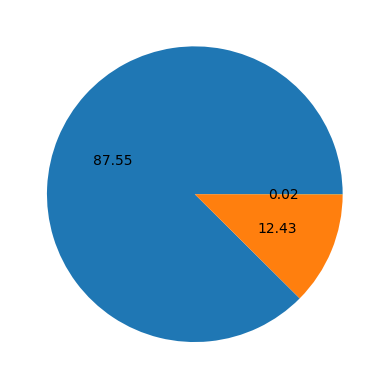

In [18]:
import matplotlib.pyplot as plt
plt.pie(count, autopct="%0.2f")
plt.show()

In [19]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Hricha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [20]:
df['Char_count']= df['Message'].apply(len)

In [21]:
# number of words
df['word_count']= df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df['Sentence_count']=df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [23]:
df.head()

,Category,Message,Char_count,word_count,Sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['Char_count','word_count','Sentence_count']].describe()

,Char_count,word_count,Sentence_count
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
df[df['Category']==0][['Char_count','word_count','Sentence_count']].describe()

,Char_count,word_count,Sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
df[df['Category']==1][['Char_count','word_count','Sentence_count']].describe()

,Char_count,word_count,Sentence_count
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [27]:
import seaborn as sns

In [28]:
# sns.histplot(df[df['Category']==0]['Char_count'])
# sns.histplot(df[df['Category']==1]['Char_count'], color='red')

In [29]:
# sns.histplot(df[df['Category']==0]['word_count'])
# sns.histplot(df[df['Category']==1]['word_count'], color='red')

<Axes: xlabel='Sentence_count', ylabel='Count'>

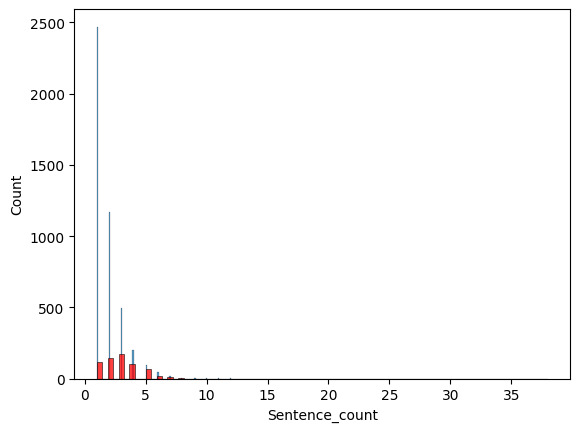

In [30]:
sns.histplot(df[df['Category']==0]['Sentence_count'])
sns.histplot(df[df['Category']==1]['Sentence_count'], color='red')

In [31]:
# sns.pairplot(df, hue= 'Category')

In [32]:
df

,Category,Message,Char_count,word_count,Sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will ü b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [33]:
dfn = df.drop(columns=['Message'])

<Axes: >

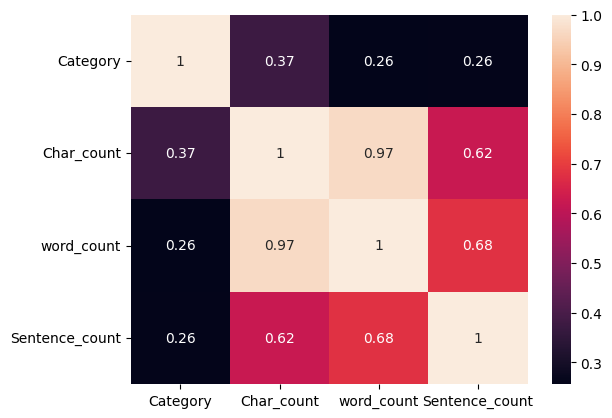

In [34]:
sns.heatmap(dfn.corr(), annot= True)

In [35]:
# the three colums have strong corelation with eachother so we will just keep num_char as it has max correaltion with category

## Data preprocessing

- lower case
- Tokenizetion
- remove special charaters and puncuations
- remove stop words(is, of, the, and..etc)
- stemming (same meaning word to same thing)

In [36]:
from nltk.corpus import stopwords  
import string

In [37]:
# steming 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
# ps.stem('loving')

In [38]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)
    #remove special charater
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    # stop words and punctuation remove
    text= y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation :
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [39]:
df['Transformed_text']=df['Message'].apply(transform_text)

In [40]:
df

,Category,Message,Char_count,word_count,Sentence_count,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will ü b going to esplanade fr home?,36,9,1,ü b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [41]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10,background_color='white')

In [42]:
spam_wc=wc.generate(df[df['Category']==1]['Transformed_text'].str.cat(sep=" "))

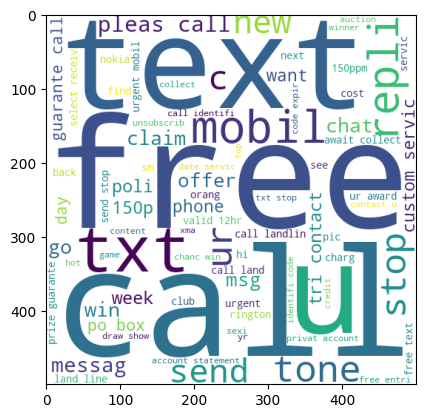

In [43]:
plt.imshow(spam_wc)

In [44]:
ham_wc=wc.generate(df[df['Category']==0]['Transformed_text'].str.cat(sep=" "))

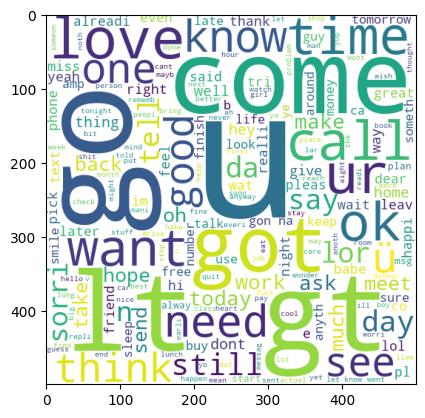

In [45]:
plt.imshow(spam_wc)

In [64]:
#getting top 30 words in spam
spam_corpus= []
for msg in df[df['Category']==1]['Transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [65]:
len(spam_corpus)

9781

In [67]:
from collections import Counter

In [69]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,311
1,free,186
2,2,154
3,txt,139
4,text,122
5,ur,119
6,u,115
7,mobil,110
8,stop,108
9,repli,103


In [70]:
ham_corpus= []
for msg in df[df['Category']==0]['Transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [71]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,897
1,go,407
2,get,351
3,2,288
4,gt,288
5,lt,287
6,come,278
7,got,239
8,know,237
9,like,236


## Model Building

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [174]:
X = df['Transformed_text']
y = df['Category']

In [175]:
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [176]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [179]:
# Initialize individual models
svc = SVC(kernel='linear', probability=True)

In [183]:
# Train SVC model
svc.fit(X_train, y_train)

LogisticRegression()

In [188]:
# Make predictions with each model
y_pred_svc = svc.predict(X_test)

# Print evaluation metrics for SVC
print("SVC Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc)}")
print(classification_report(y_test, y_pred_svc))


SVC Model Evaluation:
Accuracy: 0.9757751937984496
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.97      0.85      0.90       136

    accuracy                           0.98      1032
   macro avg       0.97      0.92      0.94      1032
weighted avg       0.98      0.98      0.98      1032



In [ ]:
# we go with SVC => most accuracy

In [189]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(tfidf, open('model.pkl','wb'))